# Analisando dataset sobre cirurgias no DF

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv('cirurgias.csv', sep=';', encoding='latin1')

In [6]:
df.head()

,Mes ref,Mes de processamento mm,Ano de processamento aaaa,Estabelecimento cnes,Codigo regiao,Regiao,Municipio do estabelecimento,Complexidade do Procedimento,Carater da internaca/ATENDIMENTO,Codigo grupo,Grupo procedimento realizado,Codigo Sub grupo,Sub grupo procedimento realizado,Codigo do procedimento realizado,Procedimento realizado,Quantidade aprovada do procedimento
0,1,JANEIRO,2017,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,8,URD,"BRASILIA, DF, BR",Média complexidade,Eletivo,4,04 - Procedimentos cirúrgicos,415,Sub Grupo: 15 - Outras cirurgias,415010012,TRATAMENTO C/ CIRURGIAS MULTIPLAS,1
1,1,JANEIRO,2017,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,8,URD,"BRASILIA, DF, BR",Média complexidade,Urgência,4,04 - Procedimentos cirúrgicos,403,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,403010098,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA,1
2,1,JANEIRO,2017,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,8,URD,"BRASILIA, DF, BR",Média complexidade,Urgência,4,04 - Procedimentos cirúrgicos,415,Sub Grupo: 15 - Outras cirurgias,415010012,TRATAMENTO C/ CIRURGIAS MULTIPLAS,1
3,1,JANEIRO,2017,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,8,URD,"BRASILIA, DF, BR",Média complexidade,Eletivo,4,04 - Procedimentos cirúrgicos,407,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,407040129,HERNIOPLASTIA UMBILICAL,1
4,1,JANEIRO,2017,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,8,URD,"BRASILIA, DF, BR",Alta complexidade,Eletivo,4,04 - Procedimentos cirúrgicos,416,Sub Grupo: 16 - Cirurgia em oncologia,416090133,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA,1


In [10]:
df.columns

Index(['Mes ref', 'Mes de processamento mm', 'Ano de processamento aaaa',
       'Estabelecimento cnes', 'Codigo regiao', 'Regiao',
       'Municipio do estabelecimento', 'Complexidade do Procedimento',
       'Carater da internaca/ATENDIMENTO', 'Codigo grupo',
       'Grupo procedimento realizado', 'Codigo Sub grupo',
       'Sub grupo procedimento realizado', 'Codigo do procedimento realizado',
       'Procedimento realizado', 'Quantidade aprovada do procedimento'],
      dtype='object')

In [12]:
# Refazendo a importação
df = pd.read_csv('cirurgias.csv', sep=';',encoding='cp1252', usecols=[3,6,7,8,12,14])

In [13]:
df.head(3)

,Estabelecimento cnes,Municipio do estabelecimento,Complexidade do Procedimento,Carater da internaca/ATENDIMENTO,Sub grupo procedimento realizado,Procedimento realizado
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [14]:
# Trocando o nome das colunas
df.columns=['Hospital','Municipio','Complexidade','Atendimento','SubGrupo','Procedimento']

In [15]:
df.columns

Index(['Hospital', 'Municipio', 'Complexidade', 'Atendimento', 'SubGrupo',
       'Procedimento'],
      dtype='object')

In [16]:
df.head(3)

,Hospital,Municipio,Complexidade,Atendimento,SubGrupo,Procedimento
0,6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE A...,"BRASILIA, DF, BR",Média complexidade,Eletivo,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS


In [17]:
df.describe()

,Hospital,Municipio,Complexidade,Atendimento,SubGrupo,Procedimento
count,4862,4862,4862,4862,4862,4862
unique,16,11,2,4,16,495
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
freq,735,1923,4353,3794,1539,1060


In [19]:
# Vamos listar os hospitais presentes no df
df['Hospital'].unique()

array(['6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB',
       '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL',
       '0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA', '0010545 HRBZ',
       '0010480 HOSPITAL REGIONAL DE CEILANDIA',
       '3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL',
       '0010472 HRG', '0010510 HOSPITAL UNIVERSITARIO DE BRASILIA',
       '0010529 HRPL',
       '0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB',
       '3055450 CBV CENTRO BRASILEIRO DA VISAO',
       '2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA', '0010502 HRS',
       '5717515 HRSM', '2645157 HRPA', '0010464 HRAN'], dtype=object)

In [20]:
# Quantos hospitais
len(df['Hospital'].unique())

16

In [30]:
# Quantas cirurgias foram realizadas em cada hospital
df['Hospital'].value_counts()

0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL           735
0010472 HRG                                                 555
0010480 HOSPITAL REGIONAL DE CEILANDIA                      461
0010464 HRAN                                                432
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA                 373
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA                  350
2645157 HRPA                                                327
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB          298
5717515 HRSM                                                281
0010529 HRPL                                                256
0010502 HRS                                                 225
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA                195
3276678 INSTITUTO DE CARDIOLOGIA DO DISTRITO FEDERAL        191
0010545 HRBZ                                                 75
6876617 HOSPITAL DA CRIANCA DE BRASILIA JOSE ALENCAR HCB     74
3055450 CBV CENTRO BRASILEIRO DA VISAO  

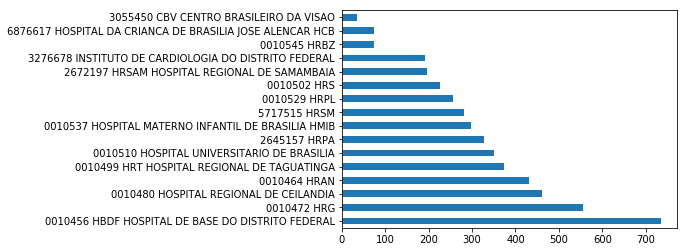

In [33]:
df['Hospital'].value_counts().plot.barh()

In [25]:
# Quantas cirurgias por subgrupo procedimentos
df['SubGrupo'].value_counts()

Sub Grupo: 11 - Cirurgia obstétrica                                                   1539
Sub Grupo: 07 - Cirurgia do aparelho digestivo, orgãos anexos e parede abdominal       893
Sub Grupo: 08 - Cirurgia do sistema osteomuscular                                      651
Sub Grupo: 09 - Cirurgia do aparelho geniturinário                                     474
Sub Grupo: 06 - Cirurgia do aparelho circulatório                                      299
Sub Grupo: 15 - Outras cirurgias                                                       223
Sub Grupo: 04 - Cirurgia das vias aéreas superiores, da cabeça e do pescoço            145
Sub Grupo: 03 - Cirurgia do sistema nervoso central e periférico                       141
Sub Grupo: 16 - Cirurgia em oncologia                                                  110
Sub Grupo: 05 - Cirurgia do aparelho da visão                                           98
Sub Grupo: 12 - Cirurgia torácica                                                       92

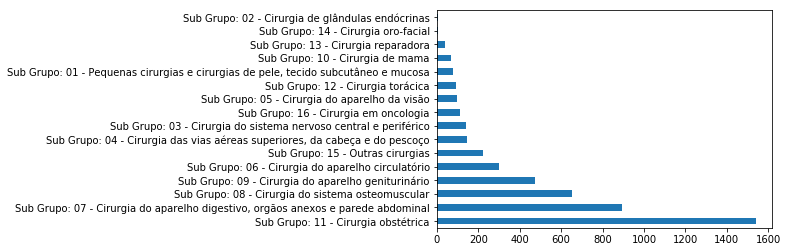

In [32]:
# Plotando gráfico por subgrupo Procedimento
df['SubGrupo'].value_counts().plot.barh()

In [36]:
# Criando um subconjunto dos dados originais
df_hbase = df[df['Hospital'] == '0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL']

In [37]:
df_hbase.head(5)

,Hospital,Municipio,Complexidade,Atendimento,SubGrupo,Procedimento
1,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,DERIVACAO VENTRICULAR EXTERNAR-SUBGALEAL EXTERNA
2,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 15 - Outras cirurgias,TRATAMENTO C/ CIRURGIAS MULTIPLAS
4,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,RESSECCAO DE TUMOR DE PARTES MOLES EM ONCOLOGIA
5,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,IMPLANTAÇÃO DE CATETER DE LONGA PERMANÊNCIA SE...
6,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 06 - Cirurgia do aparelho circulatório,TRATAMENTO CIRURGICO DE LESOES VASCULARES TRAU...


In [39]:
# Linhas finais do dataframe
df_hbase.tail(2)

,Hospital,Municipio,Complexidade,Atendimento,SubGrupo,Procedimento
2372,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 16 - Cirurgia em oncologia,SEGMENTECTOMIA/QUADRANTECTOMIA/SETORECTOMIA DE...
2373,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Alta complexidade,Eletivo,Sub Grupo: 06 - Cirurgia do aparelho circulatório,ESTUDO ELETROFISIOLOGICO TERAPEUTICO II (ABLAC...


In [40]:
df_hbase.describe()

,Hospital,Municipio,Complexidade,Atendimento,SubGrupo,Procedimento
count,735,735,735,735,735,735
unique,1,1,2,4,15,242
top,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,TRATAMENTO C/ CIRURGIAS MULTIPLAS
freq,735,735,551,361,156,47


In [42]:
# Vendo 5 linhas aleatórias
df_hbase.sample(5)

,Hospital,Municipio,Complexidade,Atendimento,SubGrupo,Procedimento
854,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 08 - Cirurgia do sistema osteomuscular,REDUCAO INCRUENTA DE FRATURA / LUXACAO / FRATU...
829,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 04 - Cirurgia das vias aéreas super...,OSTEOSSÍNTESE DE FRATURA SIMPLES DE MANDÍBULA
2020,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Outros tipos lesões/envenenamentos por agentes...,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL CRONICO
2025,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 07 - Cirurgia do aparelho digestivo...,APENDICECTOMIA
231,0010456 HBDF HOSPITAL DE BASE DO DISTRITO FEDERAL,"BRASILIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 03 - Cirurgia do sistema nervoso ce...,TRATAMENTO CIRURGICO DE SINDROME COMPRESSIVA E...


In [43]:
# Quantidade de procedimentos realizados no Hospital de Base
df_hbase['Procedimento'].value_counts()

TRATAMENTO C/ CIRURGIAS MULTIPLAS                                                                   47
TRAQUEOSTOMIA                                                                                       28
DERIVACAO VENTRICULAR PARA PERITONEO / ATRIO / PLEURA / RAQUE                                       26
TORACOSTOMIA COM DRENAGEM PLEURAL FECHADA                                                           23
IMPLANTE DE MARCAPASSO DE CAMARA DUPLA TRANSVENOSO                                                  21
TRATAMENTO CIRURGICO DE HEMATOMA SUBDURAL CRONICO                                                   18
AMPUTACAO / DESARTICULACAO DE MEMBROS INFERIORES                                                    17
TROCA DE GERADOR DE MARCAPASSO DE CAMARA DUPLA                                                      14
FACOEMULSIFICACAO C/ IMPLANTE DE LENTE INTRA-OCULAR DOBRAVEL                                        12
ANGIOPLASTIA CORONARIANA C/ IMPLANTE DE DOIS STENTS                      

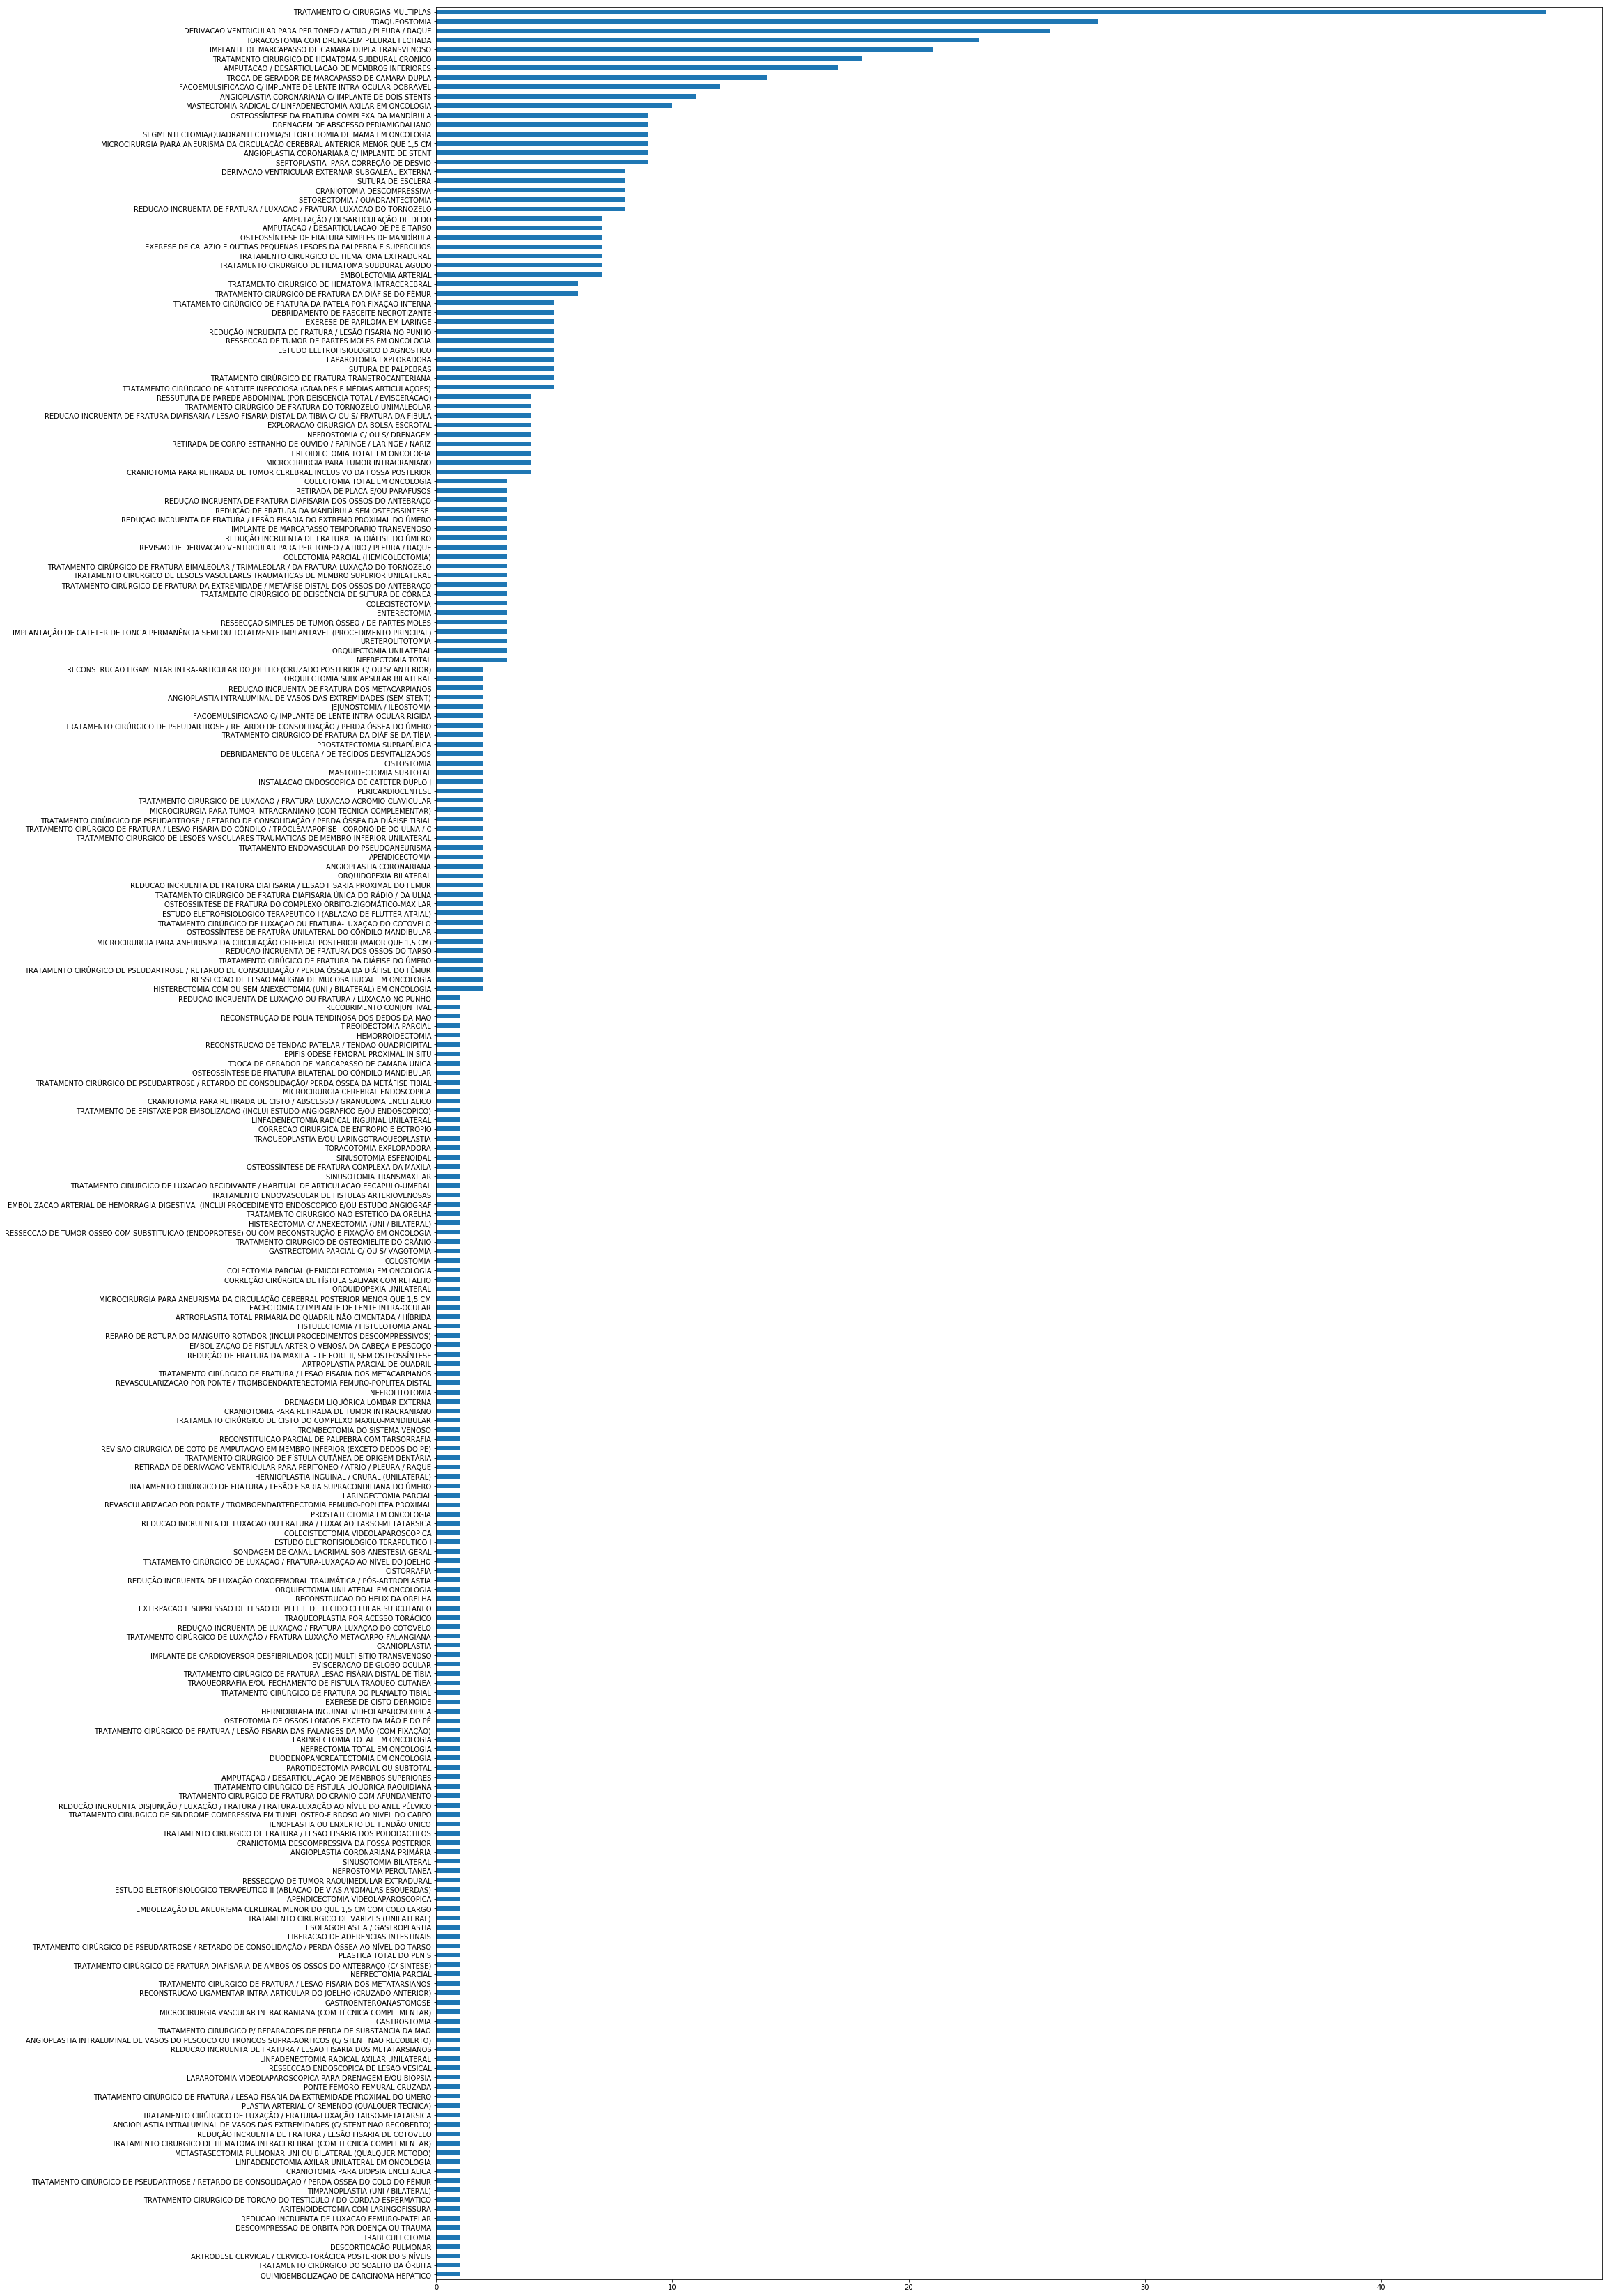

In [64]:
plt.rcParams['figure.figsize'] = (30,60)
df_hbase['Procedimento'].value_counts(ascending=True).plot.barh()

In [51]:
# Subdividindo o dataframe com base em um pedaço de palavra
df_hbase[df_hbase['Procedimento'].str.contains('AMPUTA')].count()

Hospital        33
Municipio       33
Complexidade    33
Atendimento     33
SubGrupo        33
Procedimento    33
dtype: int64

In [52]:
# Dividindo o dataframe original e criando um subconjunto de parto cesariano
df_parto_cesariano = df[df['Procedimento'] == 'PARTO CESARIANO']

In [53]:
df_parto_cesariano.head(2)

,Hospital,Municipio,Complexidade,Atendimento,SubGrupo,Procedimento
130,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO
131,0010545 HRBZ,"BRAZLANDIA, DF, BR",Média complexidade,Urgência,Sub Grupo: 11 - Cirurgia obstétrica,PARTO CESARIANO


In [54]:
# Verificando a quantidade de partos cesarianos por hospital
df_parto_cesariano['Hospital'].value_counts()

0010480 HOSPITAL REGIONAL DE CEILANDIA                165
2645157 HRPA                                          123
5717515 HRSM                                          110
0010537 HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB     93
2672197 HRSAM HOSPITAL REGIONAL DE SAMAMBAIA           92
0010502 HRS                                            92
0010464 HRAN                                           88
0010529 HRPL                                           79
0010499 HRT HOSPITAL REGIONAL DE TAGUATINGA            74
0010510 HOSPITAL UNIVERSITARIO DE BRASILIA             63
0010472 HRG                                            47
0010545 HRBZ                                           34
Name: Hospital, dtype: int64

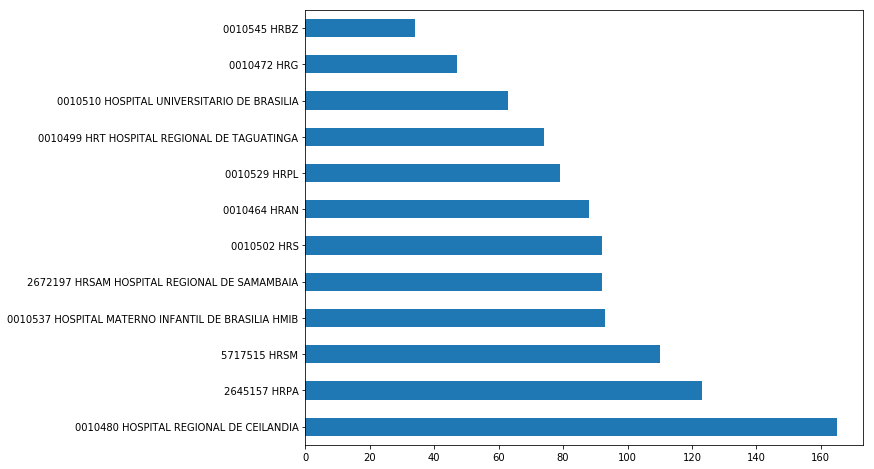

In [60]:
plt.rcParams['figure.figsize'] = (10,8)
df_parto_cesariano['Hospital'].value_counts().plot.barh()

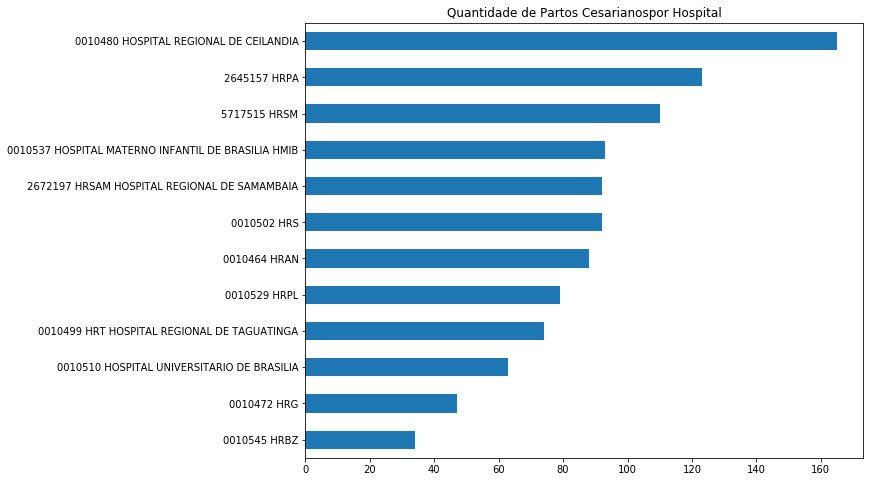

In [63]:
# Invertendo a ordem do gráfico e colocando um título
plt.rcParams['figure.figsize'] = (10,8)
df_parto_cesariano['Hospital'].value_counts(ascending=True).plot.barh(title='Quantidade de Partos Cesarianospor Hospital')

In [61]:
# Verificar a quantidade de partos por Carater Atendimento
df_parto_cesariano['Atendimento'].value_counts()

Urgência    1041
Eletivo       19
Name: Atendimento, dtype: int64

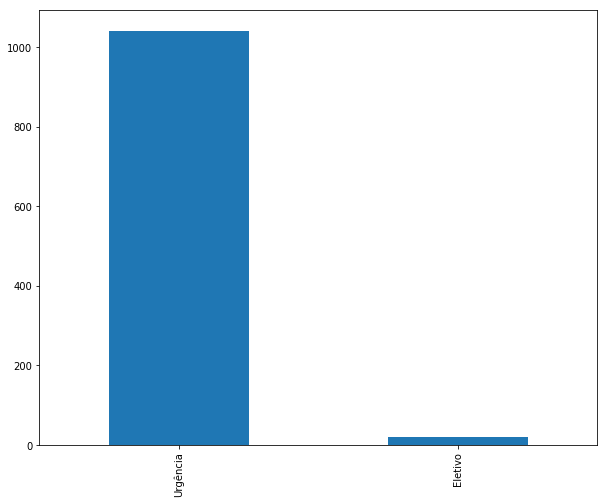

In [62]:
df_parto_cesariano['Atendimento'].value_counts().plot.bar()